In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import classification_report
from tqdm import tqdm

from model_arch_2d import ResNet, BasicBlock, Bottleneck
from dataloader import MRIDataModule, MRIDataModuleForTest
from trainer import MRIPulseSequenceClassificationTrainer

`torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
`torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.


In [3]:
layers = [2, 2, 2, 2]

device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
model = ResNet(BasicBlock, layers, num_classes=4).to(device)

print(f'Model Achitecture\n{model}')

Model Achitecture
ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), 

In [4]:
print(device)

cuda:1


In [5]:
datamodule = MRIDataModule(
    data_root="/path/to/data", 
    test_root=None,
    batch_size=16)
train_loader = datamodule.get_train_loader()
val_loader = datamodule.get_valid_loader()

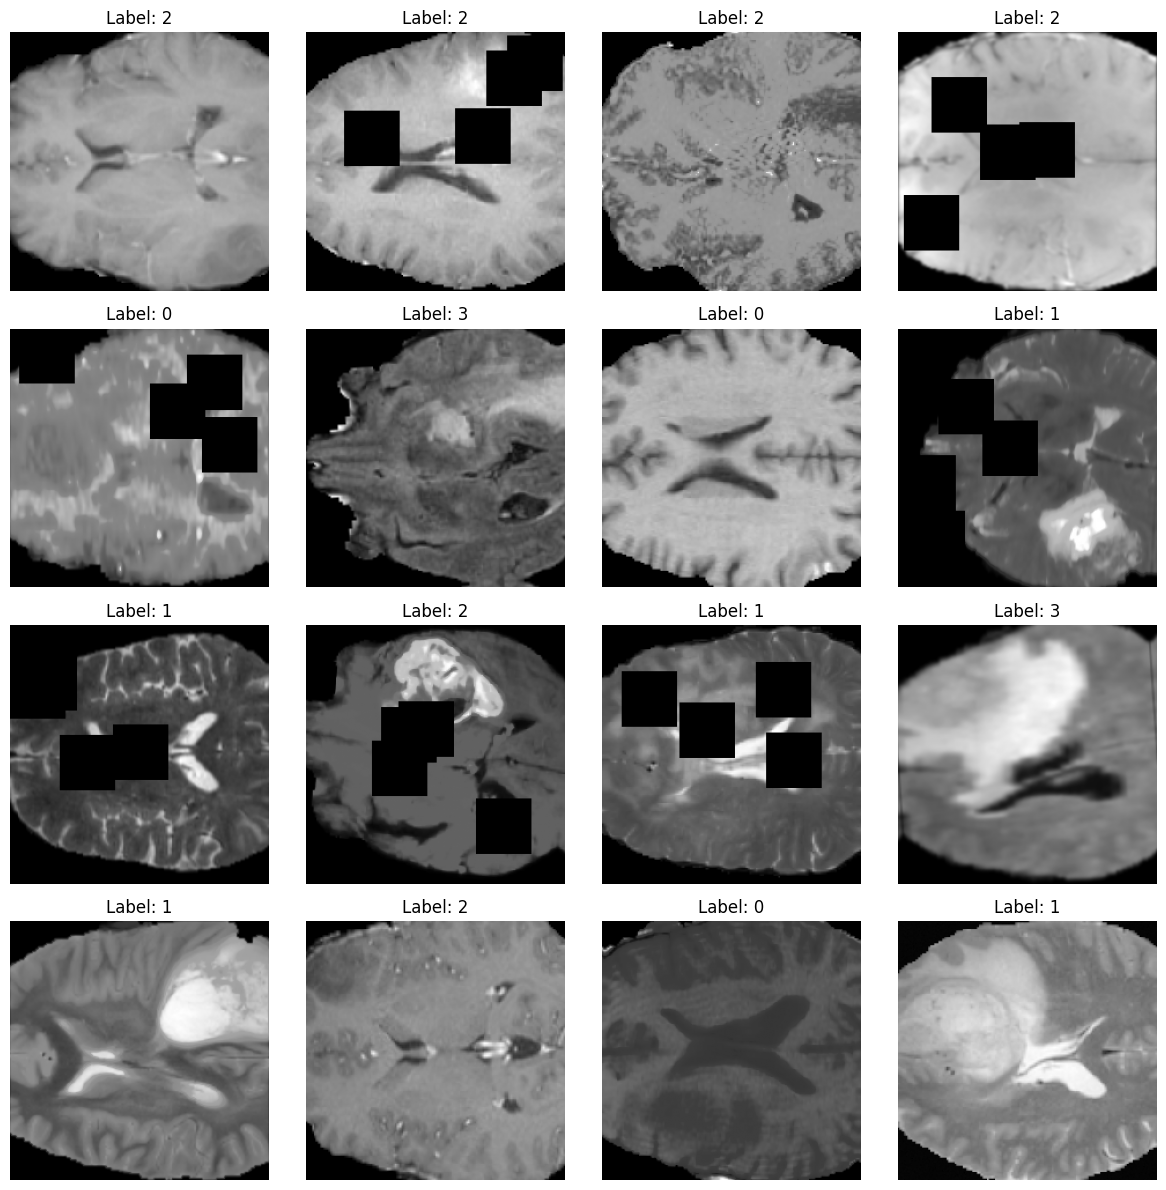

In [5]:
import matplotlib.pyplot as plt

for batch in train_loader:
    images = batch["image"]  # shape: [B, C, H, W]
    labels = batch["label"]

    batch_size = images.shape[0]
    num_to_show = min(16, batch_size)
    cols = 4
    rows = (num_to_show + cols - 1) // cols 

    fig, axes = plt.subplots(rows, cols, figsize=(12, 12))

    for idx in range(num_to_show):
        img = images[idx]
        label = labels[idx]

        if img.shape[0] == 1:
            img = img.squeeze(0)  # shape: [H, W]
            cmap = 'gray'
        elif img.shape[0] == 3:
            img = img.permute(1, 2, 0)  # shape: [H, W, 3]
            cmap = None
        else:
            raise ValueError("Unexpected number of channels")

        ax = axes[idx // cols, idx % cols]
        ax.imshow(img, cmap=cmap)
        ax.set_title(f"Label: {label.item()}")
        ax.axis("off")

    for j in range(num_to_show, rows * cols):
        axes[j // cols, j % cols].axis("off")

    plt.tight_layout()
    plt.show()
    break


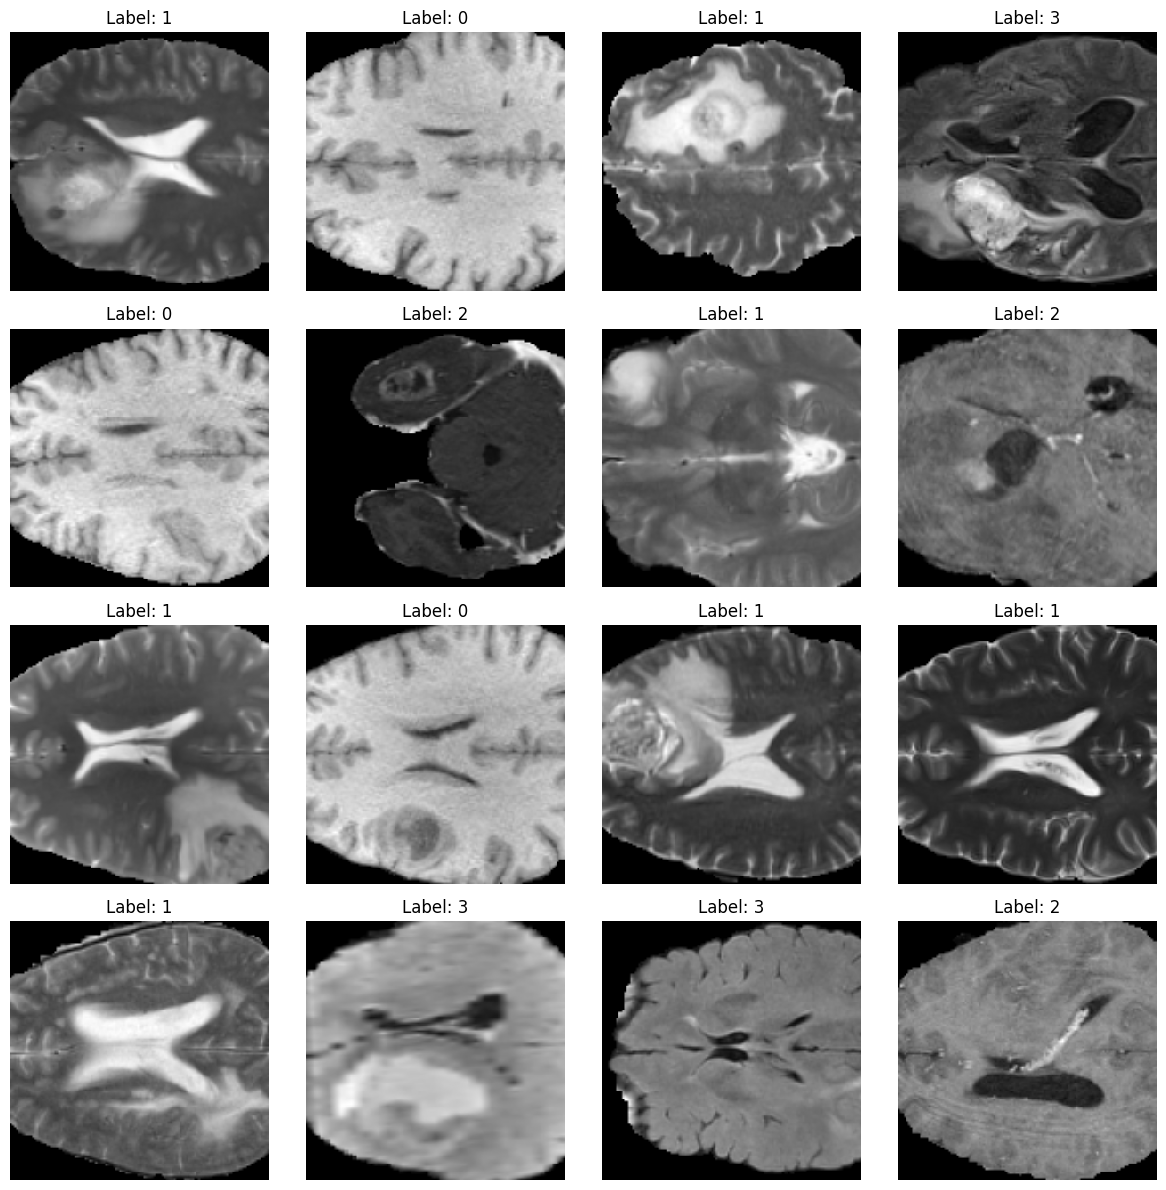

In [6]:
import matplotlib.pyplot as plt

for batch in val_loader:
    images = batch["image"]  # shape: [B, C, H, W]
    labels = batch["label"]

    batch_size = images.shape[0]
    num_to_show = min(16, batch_size) 
    cols = 4
    rows = (num_to_show + cols - 1) // cols 

    fig, axes = plt.subplots(rows, cols, figsize=(12, 12))

    for idx in range(num_to_show):
        img = images[idx]
        label = labels[idx]

        if img.shape[0] == 1:
            img = img.squeeze(0)  # shape: [H, W]
            cmap = 'gray'
        elif img.shape[0] == 3:
            img = img.permute(1, 2, 0)  # shape: [H, W, 3]
            cmap = None
        else:
            raise ValueError("Unexpected number of channels")

        ax = axes[idx // cols, idx % cols]
        ax.imshow(img, cmap=cmap)
        ax.set_title(f"Label: {label.item()}")
        ax.axis("off")

    for j in range(num_to_show, rows * cols):
        axes[j // cols, j % cols].axis("off")

    plt.tight_layout()
    plt.show()
    break


In [6]:
num_epochs = 50

trainer = MRIPulseSequenceClassificationTrainer(
    learning_rate = 1e-4,
    weight_decay  = 1e-5,
    num_epochs    = num_epochs,
    device        = device,
    es_patience   = 5,
    output_dir    = "/path/to/data"
)

trainer.train(model, train_loader, val_loader)


Epoch 1/50


  ▶ Train Loss: 0.9255 | Train Acc: 0.6026
  ▶ Valid Loss: 0.7090 | Valid Acc: 0.7038

Epoch 2/50


  ▶ Train Loss: 0.6384 | Train Acc: 0.7521
  ▶ Valid Loss: 1.1729 | Valid Acc: 0.6731
  ▶ EarlyStopping counter: 1/5

Epoch 3/50


  ▶ Train Loss: 0.4946 | Train Acc: 0.8094
  ▶ Valid Loss: 0.2768 | Valid Acc: 0.8808

Epoch 4/50


  ▶ Train Loss: 0.4135 | Train Acc: 0.8444
  ▶ Valid Loss: 0.7684 | Valid Acc: 0.7577
  ▶ EarlyStopping counter: 1/5

Epoch 5/50


  ▶ Train Loss: 0.3556 | Train Acc: 0.8748
  ▶ Valid Loss: 0.5578 | Valid Acc: 0.8308
  ▶ EarlyStopping counter: 2/5

Epoch 6/50


  ▶ Train Loss: 0.3019 | Train Acc: 0.8850
  ▶ Valid Loss: 0.2807 | Valid Acc: 0.8962
  ▶ EarlyStopping counter: 3/5

Epoch 7/50


  ▶ Train Loss: 0.3067 | Train Acc: 0.8962
  ▶ Valid Loss: 0.1655 | Valid Acc: 0.9462

Epoch 8/50


  ▶ Train Loss: 0.2770 | Train Acc: 0.8983
  ▶ Valid Loss: 0.5551 | Valid Acc: 0.8615
  ▶ EarlyStopping counter: 1/5

Epoch 9/50


  ▶ Train Loss: 0.2303 | Train Acc: 0.9239
  ▶ Valid Loss: 0.2200 | Valid Acc: 0.9538
  ▶ EarlyStopping counter: 2/5

Epoch 10/50


  ▶ Train Loss: 0.2291 | Train Acc: 0.9179
  ▶ Valid Loss: 0.1666 | Valid Acc: 0.9538
  ▶ EarlyStopping counter: 3/5

Epoch 11/50


  ▶ Train Loss: 0.2134 | Train Acc: 0.9188
  ▶ Valid Loss: 0.2695 | Valid Acc: 0.9269
  ▶ EarlyStopping counter: 4/5

Epoch 12/50


  ▶ Train Loss: 0.1856 | Train Acc: 0.9363
  ▶ Valid Loss: 0.0820 | Valid Acc: 0.9731

Epoch 13/50


  ▶ Train Loss: 0.1825 | Train Acc: 0.9363
  ▶ Valid Loss: 0.2420 | Valid Acc: 0.9385
  ▶ EarlyStopping counter: 1/5

Epoch 14/50


  ▶ Train Loss: 0.1541 | Train Acc: 0.9491
  ▶ Valid Loss: 0.2276 | Valid Acc: 0.9462
  ▶ EarlyStopping counter: 2/5

Epoch 15/50


  ▶ Train Loss: 0.1620 | Train Acc: 0.9500
  ▶ Valid Loss: 0.1673 | Valid Acc: 0.9692
  ▶ EarlyStopping counter: 3/5

Epoch 16/50


  ▶ Train Loss: 0.1721 | Train Acc: 0.9432
  ▶ Valid Loss: 0.0829 | Valid Acc: 0.9769
  ▶ EarlyStopping counter: 4/5

Epoch 17/50


  ▶ Train Loss: 0.1463 | Train Acc: 0.9462
  ▶ Valid Loss: 0.0649 | Valid Acc: 0.9846

Epoch 18/50


  ▶ Train Loss: 0.1454 | Train Acc: 0.9462
  ▶ Valid Loss: 0.0558 | Valid Acc: 0.9885

Epoch 19/50


  ▶ Train Loss: 0.1085 | Train Acc: 0.9641
  ▶ Valid Loss: 0.1058 | Valid Acc: 0.9615
  ▶ EarlyStopping counter: 1/5

Epoch 20/50


  ▶ Train Loss: 0.1343 | Train Acc: 0.9479
  ▶ Valid Loss: 0.0851 | Valid Acc: 0.9808
  ▶ EarlyStopping counter: 2/5

Epoch 21/50


  ▶ Train Loss: 0.1318 | Train Acc: 0.9556
  ▶ Valid Loss: 0.0886 | Valid Acc: 0.9769
  ▶ EarlyStopping counter: 3/5

Epoch 22/50


  ▶ Train Loss: 0.1054 | Train Acc: 0.9615
  ▶ Valid Loss: 0.0908 | Valid Acc: 0.9731
  ▶ EarlyStopping counter: 4/5

Epoch 23/50


  ▶ Train Loss: 0.1159 | Train Acc: 0.9615
  ▶ Valid Loss: 0.0867 | Valid Acc: 0.9615
  ▶ EarlyStopping counter: 5/5
  ▶ Early stopping triggered.


(0.05576805450165501, 0.9884615384615385)

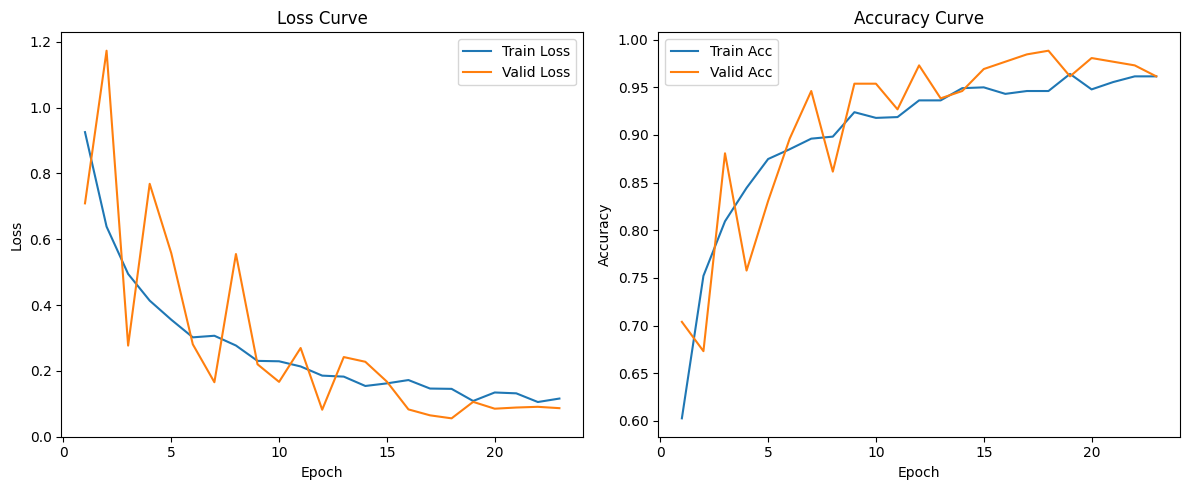

In [7]:
trainer.plot_logs()

In [11]:
datamodule3 = MRIDataModuleForTest(
    data_root="/path/to/data", 
    gd_label='t1gd',
    batch_size=32
)

test_loader3 = datamodule3.get_test_loader()

Precision: 0.9818591318591319
Recall   : 0.981517769662421
F1 Score : 0.981204575875199

GT vs Prediction Table:
     GT  Pred
0     0     0
1     3     3
2     1     1
3     2     2
4     0     0
..   ..   ...
420   1     1
421   0     0
422   1     1
423   3     3
424   2     2

[425 rows x 2 columns]


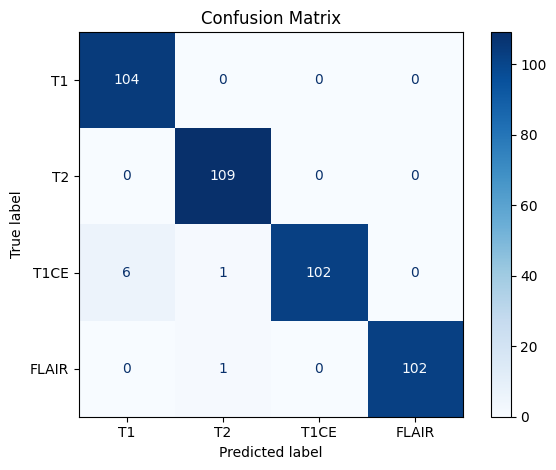

{'t1': 0.9454545454545454, 't2': 0.9819819819819819, 't1ce': 1.0, 'flair': 1.0}

In [14]:
model.eval() 
running_loss = 0.0
correct = 0
total = 0
criterion=nn.NLLLoss()

all_preds = []
all_labels = []

with torch.no_grad():
    for batch in test_loader3:
        images = batch['image'].to(device)
        labels = batch['label'].long().to(device)

        assert labels.dtype == torch.long

        outputs = model(images)
        loss = criterion(outputs, labels)

        running_loss += loss.item() * images.size(0)
        preds = outputs.argmax(dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

        correct += (preds == labels).sum().item()
        total += labels.size(0)

avg_loss = running_loss / total
accuracy = correct / total

# Metrics 계산
print(f"Accuracy  : {compute_accuracy(all_labels, all_preds):.4f}" )
print(f"Precision : {compute_precision(all_labels, all_preds, average='macro'):.4f}")
print(f"Recall    : {compute_recall(all_labels, all_preds, average='macro'):.4f}")
print(f"F1 Score  : {compute_f1_score(all_labels, all_preds, average='macro'):.4f}")

plot_confusion(all_labels, all_preds, class_names=["T1", "T2", "T1CE", "FLAIR"])

compute_per_class_accuracy(all_labels, all_preds, num_classes=4)

In [3]:
datamodule4 = MRIDataModuleForTest(
    data_root="/path/to/data", 
    gd_label='wb',
    batch_size=32
)

test_loader4 = datamodule4.get_test_loader()

Accuracy  : 0.9713
Precision : 0.9734
Recall    : 0.9733
F1 Score  : 0.9732


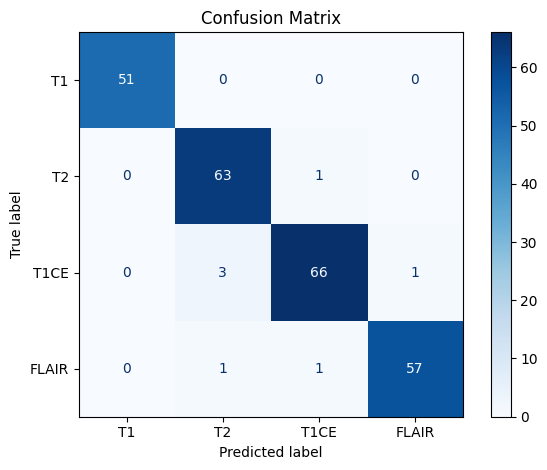

{'t1': 1.0,
 't2': 0.984375,
 't1ce': 0.9428571428571428,
 'flair': 0.9661016949152542}

In [7]:
model.eval() 
running_loss = 0.0
correct = 0
total = 0
criterion=nn.NLLLoss()

all_preds = []
all_labels = []

with torch.no_grad():
    for batch in test_loader4:
        images = batch['image'].to(device)
        labels = batch['label'].long().to(device)

        assert labels.dtype == torch.long

        outputs = model(images)
        loss = criterion(outputs, labels)

        running_loss += loss.item() * images.size(0)
        preds = outputs.argmax(dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

        correct += (preds == labels).sum().item()
        total += labels.size(0)

avg_loss = running_loss / total
accuracy = correct / total

# Metrics 계산
print(f"Accuracy  : {compute_accuracy(all_labels, all_preds):.4f}" )
print(f"Precision : {compute_precision(all_labels, all_preds, average='macro'):.4f}")
print(f"Recall    : {compute_recall(all_labels, all_preds, average='macro'):.4f}")
print(f"F1 Score  : {compute_f1_score(all_labels, all_preds, average='macro'):.4f}")

plot_confusion(all_labels, all_preds, class_names=["T1", "T2", "T1CE", "FLAIR"])

compute_per_class_accuracy(all_labels, all_preds, num_classes=4)